In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

#import NumPy and teh stats module from SciPy
import numpy as np
import scipy.stats as sts

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
import matplotlib.dates as mdates

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [6]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [7]:

#Merge the data togher
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on  = 'city')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [9]:

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]

# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

total_urban_driver_count = urban_cities_df.groupby("city").sum()['driver_count']
total_suburban_driver_count = suburban_cities_df.groupby("city").sum()['driver_count']
total_rural_driver_count = rural_cities_df.groupby("city").sum()['driver_count']

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [10]:
pd.DataFrame(
[{"City":pyber_data_df['type'].unique().tolist(),
  "Total Rides":[urban_ride_count,suburban_ride_count,rural_ride_count]}

    
]
)

,City,Total Rides
0,"[Urban, Suburban, Rural]","[[18, 22, 27, 27, 19, 29, 12, 25, 24, 28, 25, ..."


In [11]:
pd.DataFrame(
[{"City":pyber_data_df['type'].unique().tolist()[0],
  "Total Rides":urban_ride_count,
  "Total Rides":suburban_ride_count}

    
]
)

,City,Total Rides
0,Urban,city Barronchester 16 Bethanyland ...


In [12]:
pyber_data_df['type'].unique().tolist()[0]

'Urban'

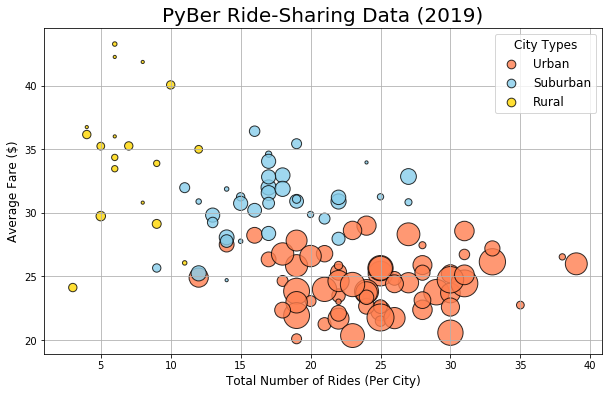

In [13]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()



In [14]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [15]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [16]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [17]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [18]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.mean()

13.712

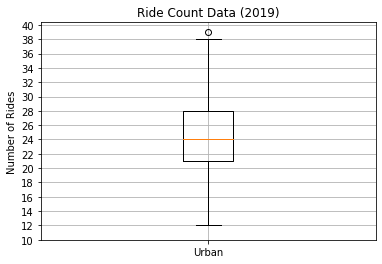

In [19]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

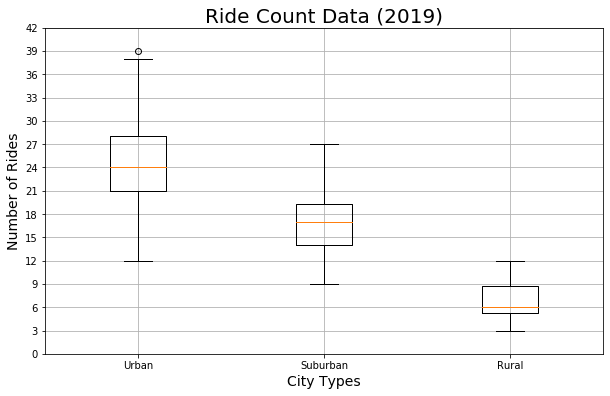

In [20]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

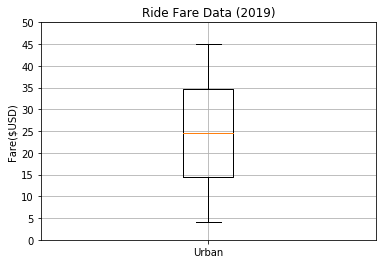

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [21]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [22]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [24]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

## Total Fares by City Type

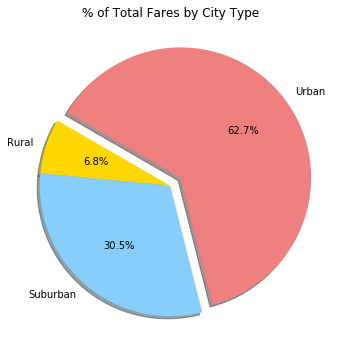

In [25]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

## Total Rides by City Type

In [26]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

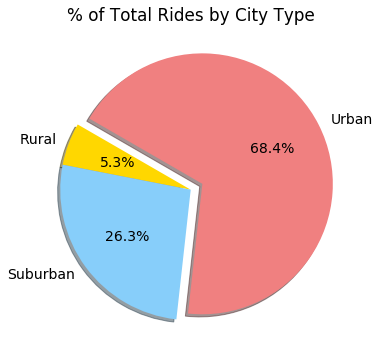

In [27]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

## Total Drivers by City Type

In [28]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

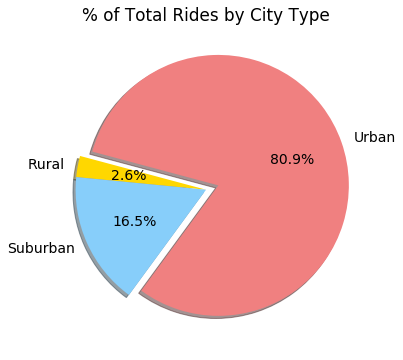

In [29]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

## Challenge

In [30]:
# Get City Types
city_types = pyber_data_df['type'].unique().tolist()
# Get the number of rides for urban cities.
urban_ride_count_type = urban_cities_df.groupby("type").count()["ride_id"]

# Create the suburban and rural ride count.
suburban_ride_count_type = suburban_cities_df.groupby(["type"]).count()["ride_id"]

rural_ride_count_type = rural_cities_df.groupby(["type"]).count()["ride_id"]

total_urban_driver_count_type = city_data_df[city_data_df["type"] == "Urban"].groupby("type").sum()['driver_count']
total_suburban_driver_count_type = city_data_df[city_data_df["type"] == "Suburban"].groupby("type").sum()['driver_count']
total_rural_driver_count_type = city_data_df[city_data_df["type"] == "Rural"].groupby("type").sum()['driver_count']

# Get total fare for each city in the urban cities.
urban_total_fare_type = urban_cities_df.groupby(["type"]).sum()["fare"]

# Get total fare for each city in the suburban and rural cities.
suburban_total_fare_type = suburban_cities_df.groupby(["type"]).sum()["fare"]
rural_total_fare_type = rural_cities_df.groupby(["type"]).sum()["fare"]

# Get the average fare per ride for city types
urban_avg_fare_type = urban_total_fare_type/urban_ride_count_type
suburban_avg_fare_type = suburban_total_fare_type/suburban_ride_count_type
rural_avg_fare_type = rural_total_fare_type/rural_ride_count_type

# Get the average fare per Driver for city types
urban_avg_fare_driver = urban_total_fare_type/total_urban_driver_count_type
suburban_avg_fare_driver = suburban_total_fare_type/total_suburban_driver_count_type
rural_avg_fare_driver = rural_total_fare_type/total_rural_driver_count_type

In [31]:
summary_df = pd.DataFrame(columns = [ 'City','Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver'] )

summary_df["City"] = city_types
summary_df["Total Rides"] = int(urban_ride_count_type), int(suburban_ride_count_type), int(rural_ride_count_type)
summary_df["Total Drivers"] = int(total_urban_driver_count_type), int(total_suburban_driver_count_type),int(total_rural_driver_count_type)
summary_df["Total Fares"] = float(urban_total_fare_type),float(suburban_total_fare_type),float(rural_total_fare_type)
summary_df["Average Fare per Ride"] = float(urban_avg_fare_type),float(suburban_avg_fare_type),float(rural_avg_fare_type)
summary_df["Average Fare per Driver"] = float(urban_avg_fare_driver),float(suburban_avg_fare_driver),float(rural_avg_fare_driver)

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df = summary_df.iloc[[2,1,0]]
summary_df.set_index('City',inplace = True)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City,,,,,
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Technical Analysis 2

In [32]:
pyber_data_df2 = pyber_data_df.rename(columns = {'city':'City', 
                                                 'date':'Date',
                                                 'fare':'Fare',
                                                 'ride_id': 'Ride Id',
        
                                                 'driver_count': 'No. Drivers', 
                                                 'type':'City Type'})

In [33]:
pyber_data_df2['Date'] = pyber_data_df2['Date'].astype('datetime64[ns]')
pyber_data_df2 = pyber_data_df2.set_index('Date')
#pyber_data_df2
date_pyber = pyber_data_df2[['City Type','Fare']].copy()
#date_pyber['Date'] = pd.to_datetime(date_pyber['Date'])
date_pyber.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [34]:
date_pyber_fares = pd.DataFrame(date_pyber.groupby(['Date','City Type']).sum()['Fare'])
#date_pyber_fares = date_pyber_fares.reset_index

date_pyber_pivot= pd.pivot_table(date_pyber_fares,index = 'Date',columns = 'City Type')

date_pyber_pivot = date_pyber_pivot.loc['2019-01-01':'2019-04-28']
#date_pyber_pivot = pd.to_datetime(date_pyber_pivot)
date_pyber_pivot

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [35]:
df_pyber_date = date_pyber_pivot.resample('W',convention = 'start').sum()
df_pyber_date

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

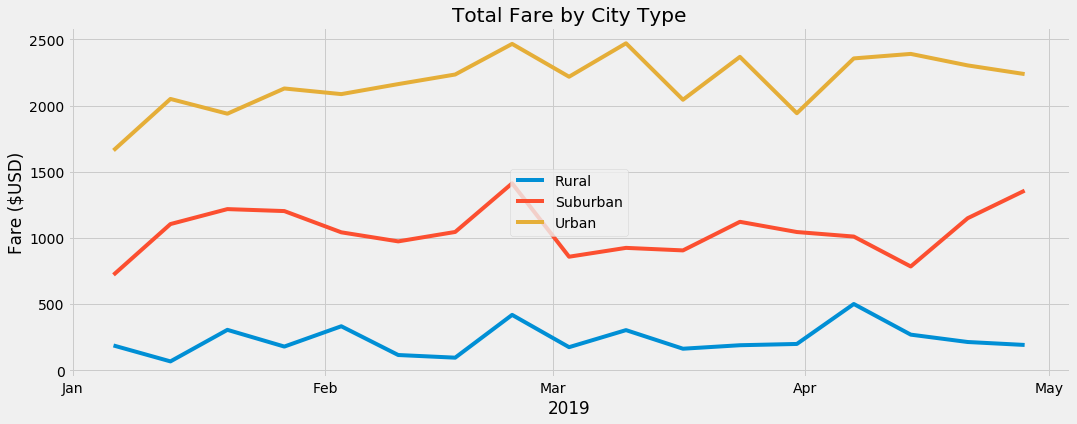

In [47]:
#Style
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(16, 6))
#Setting tick locations. 
#Get length of our dataframe, and then create tick location names
locator = mdates.MonthLocator() #Every Month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(df_pyber_date)
X = plt.gca().xaxis
X.set_major_locator(locator)
#specify formatter
X.set_major_formatter(fmt)
plt.xlabel('2019')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')
plt.legend(labels = ['Rural','Suburban','Urban'],loc = 'center')
plt.savefig("analysis/Challenge.png",dpi = 100)
plt.show()